In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.applications import vgg16
from keras.models import Model
from tensorflow import keras
from keras.utils import load_img, img_to_array
from keras.applications.imagenet_utils import preprocess_input
from sklearn.metrics.pairwise import cosine_similarity

2022-07-19 20:29:00.120881: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-19 20:29:00.120925: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
# Functions

def read_data(img_path):
    files = os.listdir(img_path)
    files = [f'{img_path}/{i}' for i in files]
    return files

def create_model():
    vgg_model = vgg16.VGG16(weights='imagenet')
    feat_extractor = Model(inputs=vgg_model.input, outputs=vgg_model.get_layer("fc2").output)
    feat_extractor.save('models/model_vgg16')

def process_all_imgs(files):
    importedImages = []
    i =1
    for f in files:
        filename = f
        original = load_img(filename, target_size=(224, 224))
        numpy_image = img_to_array(original)
        image_batch = np.expand_dims(numpy_image, axis=0)
        importedImages.append(image_batch)

        # print(i)
        i+=1
    images = np.vstack(importedImages)

    processed_imgs = preprocess_input(images.copy())
    return processed_imgs

def extract_features(processed_imgs, feat_extractor):
    imgs_features = feat_extractor.predict(processed_imgs)
    return imgs_features

def create_csv_based_on_similarity(imgs_features, files):
    cosSimilarities = cosine_similarity(imgs_features)
    files = [x[3:] for x in files]
    cos_similarities_df = pd.DataFrame(cosSimilarities, columns=files, index=files)
    cos_similarities_df.index = cos_similarities_df.index.str.replace('a/', '')
    cos_similarities_df.columns = cos_similarities_df.columns.str.replace('a/', '')
    cos_similarities_df.to_csv('data/cos_similarities.csv')
    return cos_similarities_df

def retrieve_most_similar_products(cos_similarities_df, given_img, nb_closest_images=3):
    closest_imgs = cos_similarities_df.loc[given_img].sort_values(ascending=False)[1:nb_closest_images+1].index
    return closest_imgs

In [3]:
files = read_data('data/photos_without_duplicates')

In [4]:
create_model()

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


In [5]:
processed_imgs = process_all_imgs(files)

In [6]:
feat_extractor = keras.models.load_model('model')
imgs_features = extract_features(processed_imgs, feat_extractor)

104/104 [==============================] - 277s 3s/step


In [11]:
cos_similarities_df = create_csv_based_on_similarity(imgs_features, files)

In [5]:
cos_similarities_df = pd.read_csv('data/cos_similarities.csv')
cos_similarities_df = cos_similarities_df.set_index('Unnamed: 0')
cos_similarities_df

,photos_without_duplicates/activewear_1_10.png,photos_without_duplicates/activewear_1_100.png,photos_without_duplicates/activewear_1_101.png,photos_without_duplicates/activewear_1_102.png,photos_without_duplicates/activewear_1_103.png,photos_without_duplicates/activewear_1_104.png,photos_without_duplicates/activewear_1_105.png,photos_without_duplicates/activewear_1_106.png,photos_without_duplicates/activewear_1_107.png,photos_without_duplicates/activewear_1_108.png,...,photos_without_duplicates/wedding_2_90.png,photos_without_duplicates/wedding_2_91.png,photos_without_duplicates/wedding_2_92.png,photos_without_duplicates/wedding_2_93.png,photos_without_duplicates/wedding_2_94.png,photos_without_duplicates/wedding_2_95.png,photos_without_duplicates/wedding_2_96.png,photos_without_duplicates/wedding_2_97.png,photos_without_duplicates/wedding_2_98.png,photos_without_duplicates/wedding_2_99.png
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
photos_without_duplicates/activewear_1_10.png,1.000000,0.317513,0.499629,0.346427,0.359103,0.359032,0.410092,0.408428,0.189438,0.243147,...,0.255585,0.342654,0.563133,0.354614,0.475389,0.206295,0.181216,0.404664,0.363230,0.308489
photos_without_duplicates/activewear_1_100.png,0.317513,1.000000,0.345291,0.313661,0.281288,0.314492,0.378431,0.342505,0.353285,0.612630,...,0.245489,0.340560,0.295799,0.418418,0.399734,0.270236,0.177285,0.263234,0.396998,0.425623
photos_without_duplicates/activewear_1_101.png,0.499629,0.345291,1.000000,0.433209,0.372851,0.314818,0.393178,0.374408,0.180733,0.232251,...,0.285690,0.342941,0.454208,0.437843,0.484369,0.183098,0.098058,0.376265,0.366303,0.281710
photos_without_duplicates/activewear_1_102.png,0.346427,0.313661,0.433209,1.000000,0.674487,0.486647,0.626180,0.341208,0.255489,0.303762,...,0.279266,0.309510,0.444874,0.553365,0.453074,0.203121,0.147617,0.399215,0.423512,0.374465
photos_without_duplicates/activewear_1_103.png,0.359103,0.281288,0.372851,0.674487,1.000000,0.516035,0.543431,0.322019,0.236052,0.276838,...,0.291760,0.349139,0.386184,0.543582,0.443766,0.171186,0.146982,0.420878,0.464326,0.435033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
photos_without_duplicates/wedding_2_95.png,0.206295,0.270236,0.183098,0.203121,0.171186,0.191423,0.287215,0.281586,0.388200,0.233422,...,0.367564,0.249950,0.248895,0.278357,0.242750,1.000000,0.493744,0.236818,0.269429,0.215452
photos_without_duplicates/wedding_2_96.png,0.181216,0.177285,0.098058,0.147617,0.146982,0.152764,0.214588,0.219547,0.232287,0.200268,...,0.247455,0.172892,0.191558,0.139455,0.156285,0.493744,1.000000,0.192663,0.184749,0.190516
photos_without_duplicates/wedding_2_97.png,0.404664,0.263234,0.376265,0.399215,0.420878,0.431301,0.417152,0.391454,0.198326,0.229937,...,0.491201,0.518511,0.613938,0.565507,0.703337,0.236818,0.192663,1.000000,0.564745,0.515379


In [9]:
given_img = 'photos_without_duplicates/sleep_and_lounge_2_32.png'
result_imgs = retrieve_most_similar_products(cos_similarities_df, given_img)

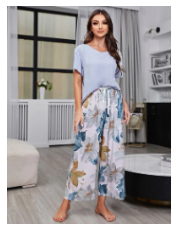

In [10]:
image = plt.imread(f'data/{given_img}')
plt.imshow(image)
plt.axis('off')
plt.show()

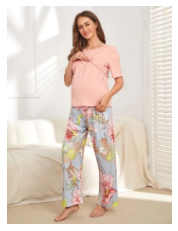

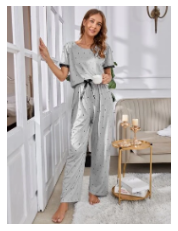

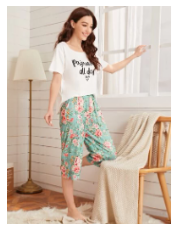

In [11]:
for url in result_imgs:
    url = f'data/{url}'
    image = plt.imread(url)
    plt.imshow(image)
    plt.axis('off')
    plt.show()
    print('\n')